In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
data = pd.read_csv("../data/波士顿房价数据.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
import numpy as np
medv = data["MEDV"] # 房价中位数

In [4]:
print('样本均值:', np.mean(medv))
print('样本标准差:', np.std(medv))
print('样本最小值:', np.min(medv))
print('样本最大值:', np.max(medv))
print('样本中位数:', np.median(medv))

样本均值: 22.532806324110698
样本标准差: 9.188011545278206
样本最小值: 5.0
样本最大值: 50.0
样本中位数: 21.2


In [5]:
data.isnull().any() # 查看是否有缺失值

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
data = data.fillna(data.mean()) # 使用每一列的平均值来填充缺失值

In [7]:
data[data > data.mean() + 2*data.std()]=np.nan # 将超过均值$+$2倍标准差的值，变成nan值，也就是替换成缺失值。
data = data.fillna(data.mean()) # 再将缺失值，替换成每一列的均值。
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
import scipy.stats as stats
print('房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数：', stats.pearsonr(data['MEDV'], data['PTRATIO'])[0])
print('房价中位数(MEDV)和犯罪率(CRIM)之间的相关系数：', stats.pearsonr(data['MEDV'], data['CRIM'])[0])
print('房价中位数(MEDV)和住宅用地比例(ZN)之间的相关系数：', stats.pearsonr(data['MEDV'], data['ZN'])[0])
print('房价中位数(MEDV)和非零售商业用地比例(INDUS)之间的相关系数：', stats.pearsonr(data['MEDV'], data['INDUS'])[0])
# print('房价中位数(MEDV)和是否临河(CHAS)之间的相关系数：', stats.pearsonr(data['MEDV'], data['CHAS'])[0])
print('房价中位数(MEDV)和氮氧化物浓度(NOX)之间的相关系数：', stats.pearsonr(data['MEDV'], data['NOX'])[0])
print('房价中位数(MEDV)和每栋住宅平均房间数(RM)之间的相关系数：', stats.pearsonr(data['MEDV'], data['RM'])[0])
print('房价中位数(MEDV)和1940年以前建筑比例(AGE)之间的相关系数：', stats.pearsonr(data['MEDV'], data['AGE'])[0])
print('房价中位数(MEDV)和与市中心的距离(DIS)之间的相关系数：', stats.pearsonr(data['MEDV'], data['DIS'])[0])
print('房价中位数(MEDV)和高速公路可接近性(RAD)之间的相关系数：', stats.pearsonr(data['MEDV'], data['RAD'])[0])
print('房价中位数(MEDV)和房地产税率(TAX)之间的相关系数：', stats.pearsonr(data['MEDV'], data['TAX'])[0])
print('房价中位数(MEDV)和有色人种比例(B)之间的相关系数：', stats.pearsonr(data['MEDV'], data['B'])[0])
print('房价中位数(MEDV)和低端人口比例(LSTAT)之间的相关系数：', stats.pearsonr(data['MEDV'], data['LSTAT'])[0])

房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数： -0.4436412592477077
房价中位数(MEDV)和犯罪率(CRIM)之间的相关系数： -0.49501437801122605
房价中位数(MEDV)和住宅用地比例(ZN)之间的相关系数： 0.37597649896879903
房价中位数(MEDV)和非零售商业用地比例(INDUS)之间的相关系数： -0.5982637357358177
房价中位数(MEDV)和氮氧化物浓度(NOX)之间的相关系数： -0.5730834989537659
房价中位数(MEDV)和每栋住宅平均房间数(RM)之间的相关系数： 0.5450921441716672
房价中位数(MEDV)和1940年以前建筑比例(AGE)之间的相关系数： -0.5165119264025304
房价中位数(MEDV)和与市中心的距离(DIS)之间的相关系数： 0.42838260762774694
房价中位数(MEDV)和高速公路可接近性(RAD)之间的相关系数： -0.4985202295412675
房价中位数(MEDV)和房地产税率(TAX)之间的相关系数： -0.580030575817653
房价中位数(MEDV)和有色人种比例(B)之间的相关系数： 0.39302130572997096
房价中位数(MEDV)和低端人口比例(LSTAT)之间的相关系数： -0.6844469309459535


In [9]:
print('房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数：', stats.pearsonr(data['MEDV'], data['PTRATIO']))
print('房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数：', stats.pearsonr(data['PTRATIO'], data['MEDV']))
# 相关性系数是一个介于-1和1之间的数字。r = 1或-1，数字样本完全拟合线性回归直线。r介于-1和1之间，r的绝对值表示数字样本与线性回归直线的离散程度。
# 大绝对值表示离散程度越低。小绝对值表示离散程度越大。r=0表示完全不相关。也就是说样本完全随机分布在回归直线周围
pccs = np.corrcoef(data['PTRATIO'], data['MEDV']) # 皮爾遜係數
pccs

房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数： (-0.4436412592477077, 8.188818578261142e-26)
房价中位数(MEDV)和师生比例(PTRATIO)之间的相关系数： (-0.4436412592477077, 8.188818578261142e-26)


array([[ 1.        , -0.44364126],
       [-0.44364126,  1.        ]])

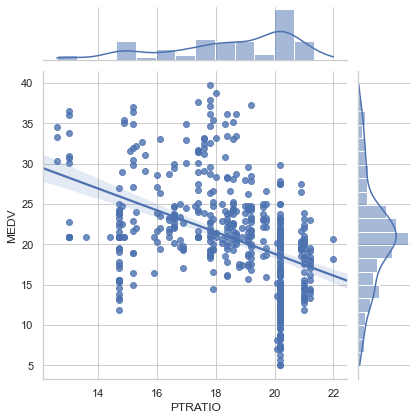

In [10]:
# 绘制房价中位数和师生比例这两个变量的散点图，它们看上去线性关系不是很大
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
g = sns.jointplot(x="PTRATIO", y="MEDV", data=data,
                  kind="reg", truncate=False,
                  height=6)

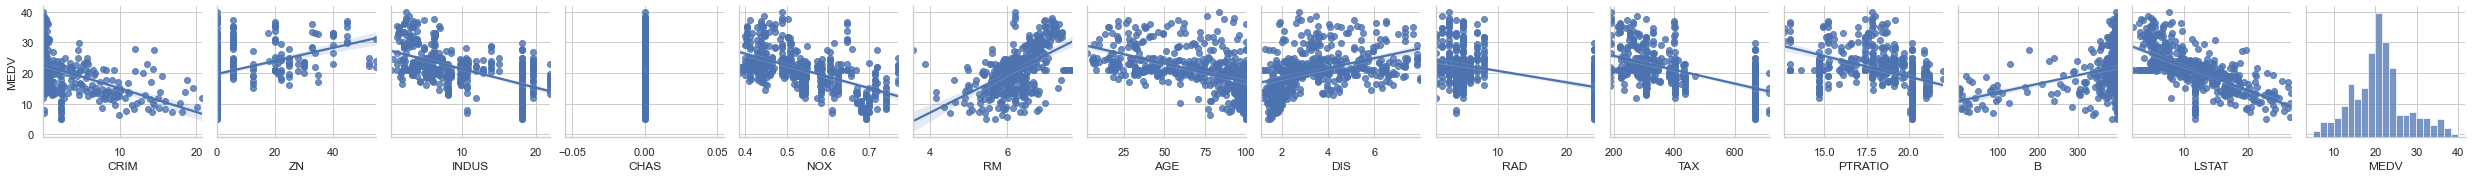

In [11]:
sns.pairplot(data, kind="reg", y_vars=["MEDV"])

<AxesSubplot:>

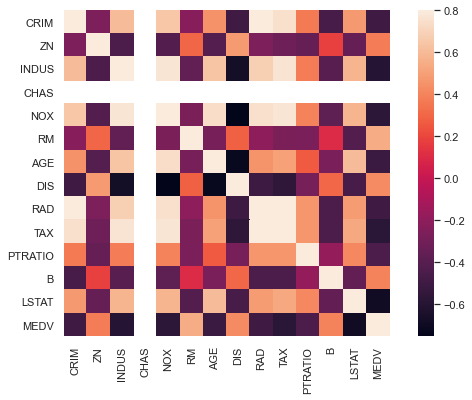

In [12]:
# 使用seaborn来绘制变量之间相关性的热力图，颜色越深代表相关性越弱，颜色越浅代表相关性越强。
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [13]:
# data.columns
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
x

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
# 下面使用OLS作普通最小二乘，fit方法对回归方程进行估计，summary保存了计算的结果。
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     74.11
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          3.80e-102
Time:                        14:30:29   Log-Likelihood:                -1410.5
No. Observations:                 506   AIC:                             2847.
Df Residuals:                     493   BIC:                             2902.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2831      3.818      5.313      0.000      12.782      27.784
CRIM          -0.1235      0.074     -1.663      0.097      -0.269       0.022
ZN             0.0221      0.018      1.202      0.230      -0.014       0.058
INDUS         -0.0588      0.052     -1.122      0.262      -0.162       0.044
CHAS        7.001e-15   2.82e-15      2.484      0.013    1.46e-15    1.25e-14
NOX          -11.5391      4.145     -2.784      0.006     -19.682      -3.396
RM             3.2536      0.356      9.139      0.000       2.554       3.953
AGE           -0.0152      0.011     -1.371      0.171      -0.037       0.007
DIS           -0.6102      0.177     -3.443      0.001      -0.958      -0.262
RAD            0.1969      0.059      3.323      0.001       0.080       0.313
TAX           -0.0110      0.003     -3.772      0.000      -0.017      -0.005
PTRATIO       -0.3206      0.099     -3.223      0.001      -0.516      -0.125
B              0.0092      0.002      4.094      0.000       0.005       0.014
LSTAT         -0.3410      0.045     -7.574      0.000      -0.430      -0.253
==============================================================================
Omnibus:                       33.463   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.830
Skew:                           0.376   Prob(JB):                     4.16e-16
Kurtosis:                       4.671   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
# 使用print语句可以更美观的显示结果，但有时候会出现无法对齐的问题。
print(result.summary(alpha=0.05))  #指定显著性水平

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     74.11
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          3.80e-102
Time:                        14:30:29   Log-Likelihood:                -1410.5
No. Observations:                 506   AIC:                             2847.
Df Residuals:                     493   BIC:                             2902.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2831      3.818      5.313      0.0

In [16]:
# 通过观察上面的回归结果：
# - 模型的F值F-statistic = 74.11， 对应的P值Prob (F-statistic) = 3.80e-102，说明模型是非常显著的。
# - 可见拟合优度R-squared = 0.643，修正的拟合优度Adj.R-squared = 0.635，说明模型的解释能力是很好的。

In [17]:
# 模型的回归方程为：
# $$
# TC = 20.2831 - 0.1235\times CRIM + 0.0221\times ZH - 0.0588\times INDUS + 7.001e-15\times CHAS - 11.5391\times NOX + 3.2536\times RM -0.0152\times AGE -0.6102\times DIS + 0.1969 \times RAD - 0.0110\times TAX - 0.3206\times PTRATIO + 0.0092\times B - 0.3410\times LSTAT
# $$

In [18]:
# 对于解释变量系数$\beta$的假设检验，这里的原假设是系数$\beta=0$，备择假设是系数$\beta\neq 0$， 忘记假设检验的步骤，点击[这里](图片/假设检验2.png)。

# 观察刚才的回归结果，我们看到对于变量Q，其系数$\beta=0$的t统计量为39.258，P值为0.000，P值小于显著性水平alpha=0.05，需要拒绝原假设。说明回归得到系数是显著不为零的。

# 同样，我们会到结论，PL显著不为零，PF显著不为零。但是变量PK(资本租赁价格)的回归系数的检验结果，t=1.073， P=0.285，P值大于显著性水平alpha=0.05，不能拒绝原假设。

# 试着剔除变量PK，也就是不包含PK这一列，再次进行多元回归分析，请自行练习。

In [19]:
# 根据微观经济学对于【规模经济】的解释，在一定的产量范围内，随着产量的增加，生产的平均成本不断降低。

# 根据上面的多元回归分析的结果，可以看出，电力企业的总成本(TC)受到产量(Q)、工资率(PL)、燃料价格(PF)的影响，存在规模经济。例如，增加一个单位的产量(Q)，保持其他变量不变，带来的总成本增加小于一个单位的变化。

In [20]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
x

,Intercept,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)
print(result.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     109.1
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          2.56e-104
Time:                        14:30:29   Log-Likelihood:                -1414.8
No. Observations:                 506   AIC:                             2848.
Df Residuals:                     497   BIC:                             2886.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4116      3.800      5.108      0.0

In [22]:
# 根据上面的多元回归分析的结果，可以看出，电力企业的总成本(TC)受到产量(Q)、工资率(PL)、燃料价格(PF)的影响，存在规模经济。例如，增加一个单位的产量(Q)，保持其他变量不变，带来的总成本增加小于一个单位的变化。

In [23]:
2.56e-104

2.56e-104

In [24]:
# MEDV = 20.2831 - 0.1235\times CRIM + 0.0221\times ZH - 0.0588\times INDUS + 7.001e-15\times CHAS - 11.5391\times NOX + 3.2536\times RM -0.0152\times AGE -0.6102\times DIS + 0.1969 \times RAD - 0.0110\times TAX - 0.3206\times PTRATIO + 0.0092\times B - 0.3410\times LSTAT

In [25]:
# MEDV = 19.4116 - 2.608e-12\times CHAS - 14.7316\times NOX + 3.4016\times RM - 0.4051\times DIS + 0.1739 \times RAD - 0.0121\times TAX - 0.3238\times PTRATIO + 0.0100\times B - 0.3776\times LSTAT

In [26]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'INDUS', 'NOX', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)
print(result.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          6.31e-103
Time:                        14:30:29   Log-Likelihood:                -1420.6
No. Observations:                 506   AIC:                             2857.
Df Residuals:                     498   BIC:                             2891.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7873      3.531      4.754      0.0

In [27]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',
       'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)
print(result.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     85.06
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          8.39e-101
Time:                        14:30:29   Log-Likelihood:                -1418.3
No. Observations:                 506   AIC:                             2859.
Df Residuals:                     495   BIC:                             2905.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5823      3.577      4.636      0.0

In [28]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 
       'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
x

,Intercept,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,21.0,393.45,6.48


In [29]:
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)
print(result.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     85.06
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          8.39e-101
Time:                        14:30:29   Log-Likelihood:                -1418.3
No. Observations:                 506   AIC:                             2859.
Df Residuals:                     495   BIC:                             2905.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5823      3.577      4.636      0.0

In [30]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)
print(result.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          6.31e-103
Time:                        14:30:29   Log-Likelihood:                -1420.6
No. Observations:                 506   AIC:                             2857.
Df Residuals:                     498   BIC:                             2891.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7873      3.531      4.754      0.0